# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")

total_data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [3]:
#Study of variables and their content

total_data = total_data.drop(columns="package_name", axis=1)
total_data

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


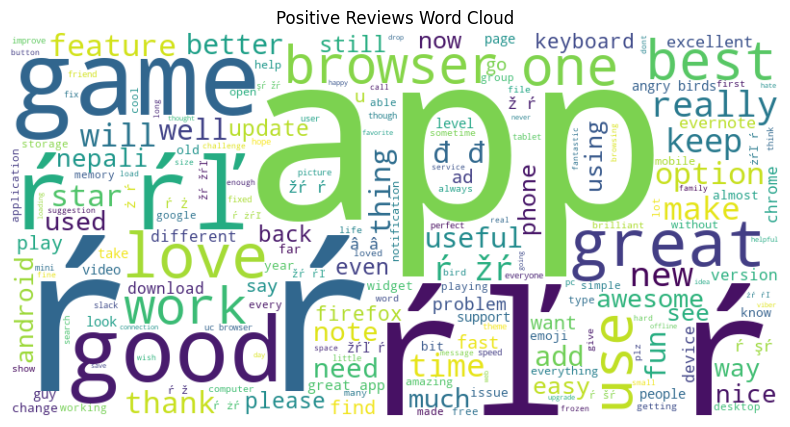

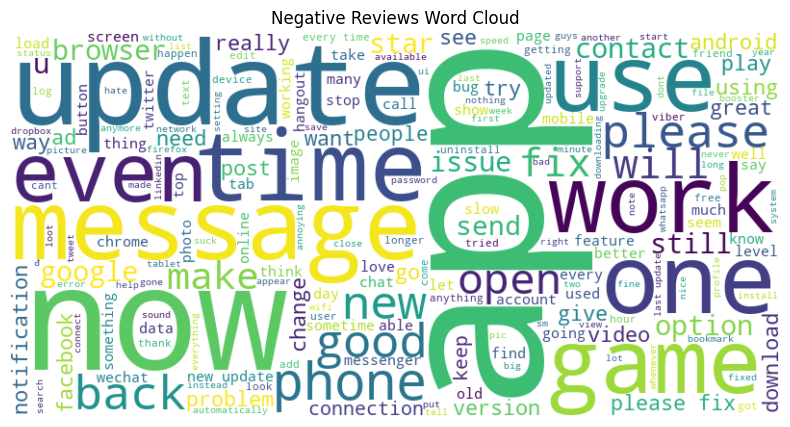

In [5]:
#Build Word Cloud 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split DataFrame into two based on polarity
positive_df = total_data[total_data['polarity'] == 1]
negative_df = total_data[total_data['polarity'] == 0]

# Preprocess the text data if necessary (e.g., remove punctuation, convert to lowercase, remove stopwords)

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each class
generate_word_cloud(positive_df['review'], 'Positive Reviews Word Cloud')
generate_word_cloud(negative_df['review'], 'Negative Reviews Word Cloud')

In [7]:
#Remove spaces and convert the text to lowercase

def apply_preprocess(df):
    df = df.drop("package_name", axis=1, errors='ignore')
    df["review"] = df["review"].str.strip().str.lower()

    return df

total_data = apply_preprocess(total_data)

total_data.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [8]:
#Divide data set fro training and testing 
from sklearn.model_selection import train_test_split

X = total_data["review"]
y = total_data["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
Name: review, dtype: object

In [9]:
#Transform the text into a word count matrix

from sklearn.feature_extraction.text import CountVectorizer

vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
#Build a naive bayes model- MultinomialNB Model 

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8156424581005587

In [23]:
#Build a naive bayes model- Gaussian & Bernoulli  Model 
from sklearn.naive_bayes import GaussianNB, BernoulliNB

for model_aux in [GaussianNB(), BernoulliNB()]:
    model_aux.fit(X_train, y_train)
    y_pred_aux = model_aux.predict(X_test)
    print(f"{model_aux} with accuracy: {accuracy_score(y_test, y_pred_aux)}")

GaussianNB() with accuracy: 0.8044692737430168
BernoulliNB() with accuracy: 0.770949720670391


In [24]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "alpha": np.linspace(0.01, 10.0, 200),
    "fit_prior": [True, False]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1.06422111,  1.11442211,  1.1646231...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

In [25]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'fit_prior': False, 'alpha': 1.917638190954774}


In [26]:
model = MultinomialNB(alpha = 1.917638190954774, fit_prior = False)
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

In [15]:
#Lets Try Logistic Regression becuase it's a strong baseline for any classification problem

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)  

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.8324


In [ ]:
# Random Forest Classifier It’s a robust ensemble method that can handle both numerical and categorical data well, offering insights into feature importance.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100,  
                                             random_state=42)  

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = random_forest_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Random Forest Classifier: {accuracy:.4f}")

Accuracy of the Random Forest Classifier: 0.7989
